In [1]:
import os
import json
import numpy as np
from prettytable import PrettyTable

img_idx = None
all_scenes = ['garden', 'room', 'drjohnson', 'counter', 'playroom', 'train', 'kitchen', 'bicycle', 'stump', 'bonsai', 'truck']
m360_scenes = ['garden', 'room', 'counter', 'kitchen', 'bicycle', 'stump', 'bonsai']
db_scenes = ['drjohnson', 'playroom']
tandt_scenes = ['train', 'truck']
scenes = all_scenes

In [2]:
eval_path = './eval'
folders = os.listdir(eval_path)

metrics_dict = {}
for folder in folders:
    result_path = os.path.join(eval_path, folder, 'results.json')

    if not os.path.exists(result_path):
        continue
    if folder not in scenes:
        continue
    data = json.load(open(result_path))
    for key in data.keys():
        if key not in metrics_dict:
            metrics_dict[key] = {}
            metrics_dict[key]['name'] = []
        metrics_dict[key]['name'].append(folder)
        for metric_key in data[key].keys():
            if metric_key not in metrics_dict[key]:
                metrics_dict[key][metric_key] = []
            metrics_dict[key][metric_key].append(data[key][metric_key])

# turn metrics_dict to a PrettyTable
table = PrettyTable()
avg_dict = []
for iter in metrics_dict.keys():
    for key in metrics_dict[iter].keys():
        if key == 'name':
            metrics_dict[iter][key].append('AVERAGE')
            table.add_column(iter, metrics_dict[iter][key])
        else:
            col_data = np.array(metrics_dict[iter][key])
            avg = np.mean(col_data)
            col_data = np.append(col_data, avg)
            table.add_column(key, np.round(col_data, decimals=4))
print(table.get_string())

+------------+--------+---------+--------+-----------+--------+---------+--------+
| ours_30000 |  SSIM  |   PSNR  | LPIPS  | ours_7000 |  SSIM  |   PSNR  | LPIPS  |
+------------+--------+---------+--------+-----------+--------+---------+--------+
|   garden   | 0.8669 | 27.4065 | 0.1063 |   garden  | 0.8285 | 26.2095 | 0.1629 |
|    room    | 0.9195 |  31.569 | 0.2178 |    room   | 0.8948 | 29.5165 | 0.2605 |
| drjohnson  | 0.9004 | 29.0834 | 0.2445 | drjohnson | 0.8615 | 27.0283 | 0.3328 |
|  counter   | 0.9085 | 29.0039 | 0.2001 |  counter  | 0.8785 | 27.1755 | 0.2453 |
|  playroom  | 0.9072 | 30.0093 | 0.2433 |  playroom | 0.8979 | 29.5556 | 0.2867 |
|   train    | 0.8134 | 21.9383 | 0.2079 |   train   | 0.7107 | 19.4114 | 0.3299 |
|  kitchen   | 0.9277 | 31.5889 | 0.1257 |  kitchen  | 0.905  | 29.4152 | 0.1583 |
|  bicycle   | 0.7658 | 25.1973 | 0.2097 |  bicycle  | 0.6651 |  23.593 | 0.334  |
|   stump    | 0.7721 | 26.5976 | 0.2149 |   stump   | 0.7235 | 25.7233 | 0.2938 |
|   

In [12]:
import matplotlib.pyplot as plt

scene = 'stump'
img_path = os.path.join(eval_path, scene, 'test/ours_30000')
gt_path = os.path.join(img_path, 'gt')
renders_path = os.path.join(img_path, 'renders')

file_names = os.listdir(gt_path)
file_names.sort()

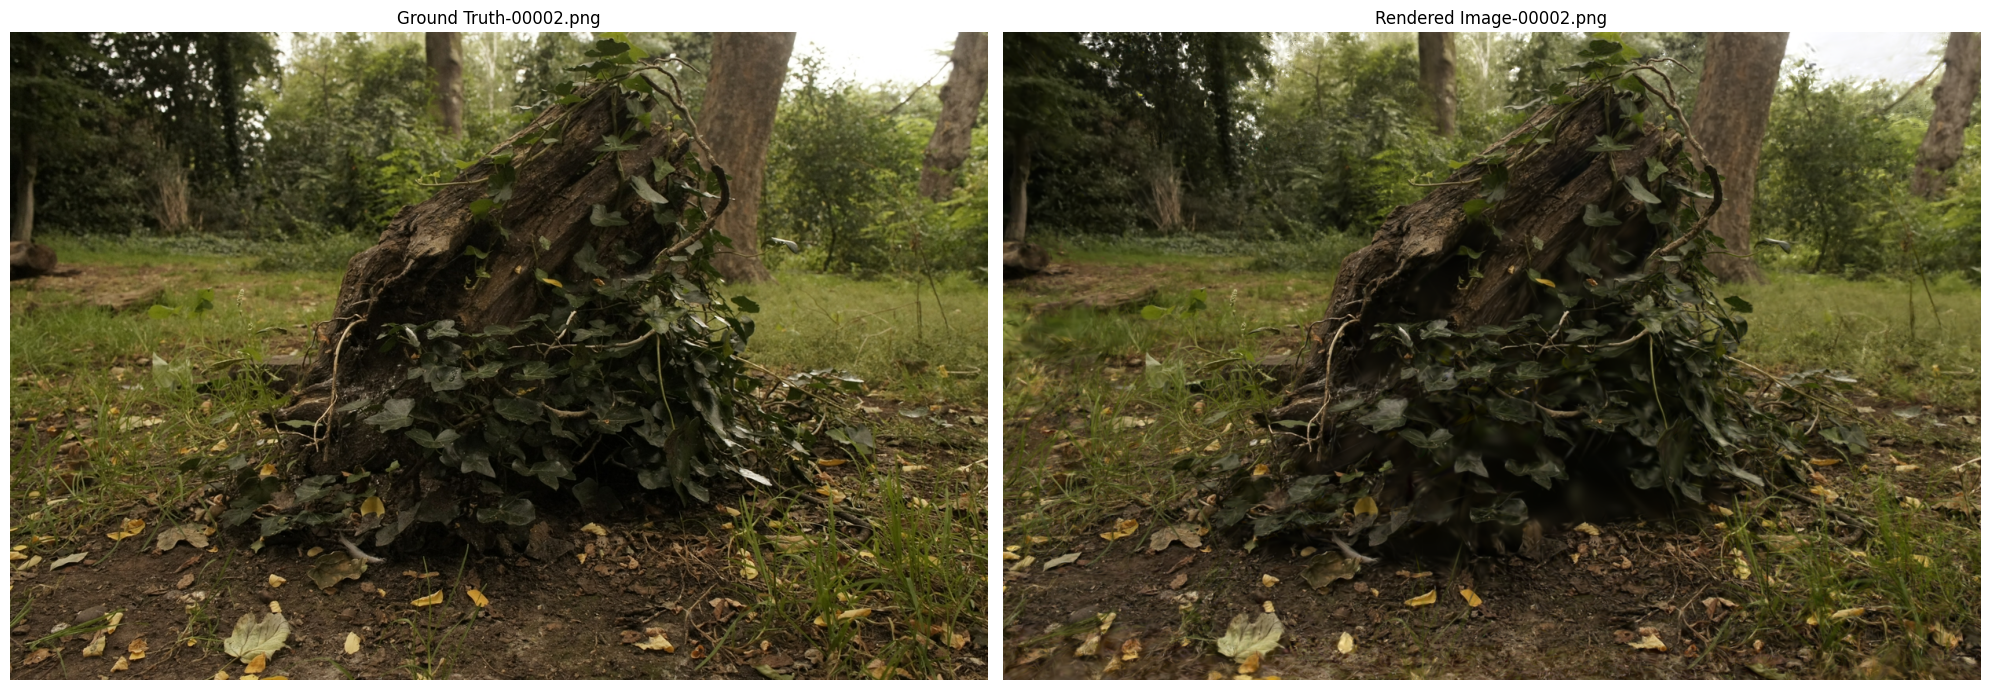

Done


In [26]:
if img_idx is None:
    img_idx = 0
else:
    img_idx = (img_idx + 1) % len(file_names)

plt.figure(figsize=(20, 40))
gt_img = plt.imread(os.path.join(gt_path, file_names[img_idx]))
plt.subplot(1, 2, 1)
plt.imshow(gt_img)
plt.title(f'Ground Truth-{file_names[img_idx]}')
plt.axis('off')
render_img = plt.imread(os.path.join(renders_path, file_names[img_idx]))
plt.subplot(1, 2, 2)
plt.imshow(render_img)
plt.title(f'Rendered Image-{file_names[img_idx]}')
plt.axis('off')
plt.tight_layout()
plt.show()
print('Done')